<a href="https://colab.research.google.com/github/shirakawa24/aaaa/blob/main/slope_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第一フレームを参照画像に

前後フレームの傾きを見る

第一フレームを参照画像にセット&RGB+Grヒストグラム算出
参照画像変更169
参照画像変更371
参照画像変更392
capture error!!
ヒストグラム相関値をグラフ表示


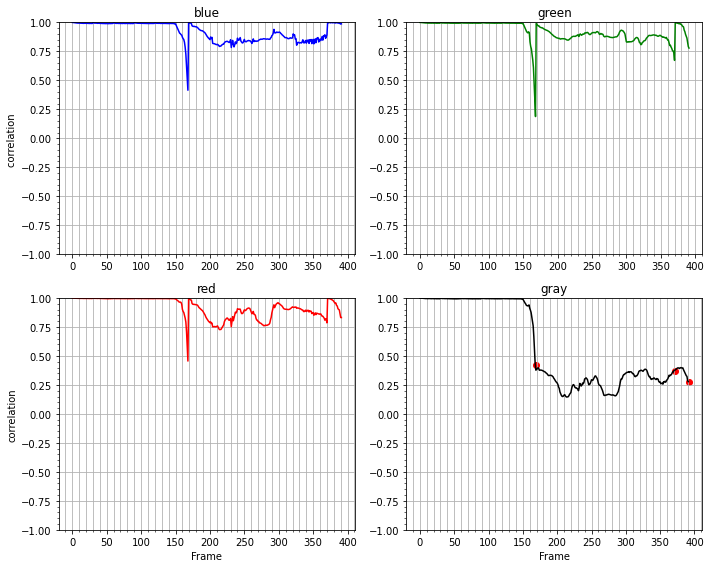

10.694923780999943


In [ ]:
import cv2
import time
import copy
import numpy as np
from matplotlib import pyplot as plt

# 開始
start_time = time.perf_counter()
# ダミー処理
time.sleep(1)

# カメラの場合path = 0 
video_path = "/content/drive/MyDrive/Deep_learning/Dataset/imovie_processing/wipe_right.mp4"
capture= cv2.VideoCapture(video_path)

count=0
colors = ("b","g","r")
blue_result=[]
green_result=[]
red_result=[]
gray_result=[]
plot=[]
value=[]
blue_slope=0
green_slope=0
red_slope=0

#グラフ設定

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(10,8))

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

c1,c2,c3,c4 = "blue","green","red","black"      # 各プロットの色
l1,l2,l3,l4 = "blue","green","red","black"   # 各ラベル

while True:
  # カメラ/動画の画像を1フレーム分取得
  ret, img = capture.read()
  if not ret:
    print("capture error!!")
    break

  count +=1

  #動画の第1フレームを参照画像にする
  if count==1:
    reference=img
    for i,col in enumerate(colors):
      hist_one_frame = cv2.calcHist([reference],[i],None,[256],[0,256])
      if col == "b":
        hist_blue_ref = hist_one_frame
      elif col =="g":
        hist_green_ref = hist_one_frame
      elif col == "r":
        hist_red_ref = hist_one_frame
    gray_ref = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)
    gray_ref_hist = cv2.calcHist([gray_ref],[0],None,[256],[0,256])

    print("第一フレームを参照画像にセット&RGB+Grヒストグラム算出")

  #1フレームごとに処理
  
  #plt.clf()

  #color
  for i, channel in enumerate(colors):
    hist_mobie2frame = cv2.calcHist([img],[i],None,[256],[0,256])

    if channel == "b":
      #残りフレームのヒストグラムより相関値を算出する
      hist_blue_movie=hist_mobie2frame
      corr=np.corrcoef(hist_blue_ref.flatten(),hist_blue_movie.flatten())[0,1] 
      blue_result.append(corr)

      #slope
      if count==1:
        corr1=copy.copy(corr) 
      elif count > 1 :
        blue_slope = (corr-corr1)/(count-(count-1))#前後は分母1
        corr1=copy.copy(corr)
      

    elif channel =="g":
      #残りフレームのヒストグラムより相関値を算出する
      hist_green_movie=hist_mobie2frame

      corr=np.corrcoef(hist_green_ref.flatten(),hist_green_movie.flatten())[0,1] 
      green_result.append(corr)

      #slope
      if count==1:
        corr1=copy.copy(corr) 
      elif count > 1 :
        green_slope = (corr-corr1)/(count-(count-1))#前後は分母1
        corr1=copy.copy(corr)
      
      

    elif channel == "r":
      #残りフレームのヒストグラムより相関値を算出する
      hist_red_movie=hist_mobie2frame

      corr=np.corrcoef(hist_red_ref.flatten(),hist_red_movie.flatten())[0,1] 
      red_result.append(corr)

      #slope
      if count==1:
        corr1=copy.copy(corr) 
      elif count > 1 :
        red_slope = (corr-corr1)/(count-(count-1))#前後は分母1
        corr1=copy.copy(corr)
      
#gray
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  hist_gray_movie = cv2.calcHist([gray],[0],None,[256],[0,256])

  #残りフレームのヒストグラムより相関値を算出する
  corr=np.corrcoef(gray_ref_hist.flatten(),hist_gray_movie.flatten())[0,1]
  gray_result.append(corr)

#検出されたら参照画像切り替えが行われる()

  if blue_slope<-0.2 or green_slope<-0.2 or red_slope<-0.2:

    reference = img

    #カラー化DeepLearningに知らせる
    print("参照画像変更"+str(count))

    #切り替えタイミングをgrayにプロットする。grayの値を保持
    plot.append(copy.copy(count))
    value.append(copy.copy(corr))

    #参照画像が切り替わる
    hist_blue_ref=hist_blue_movie
    hist_green_ref=hist_green_movie
    hist_red_ref=hist_red_movie
    gray_hist_movie=hist_gray_movie

  

#==========ここまでループ内==============#

print("ヒストグラム相関値をグラフ表示")

#グラフ設定
ax1.plot(blue_result, color=c1, label=l1)
ax1.set_title("blue")
ax1.set_ylim(-1,1)
ax1.set_ylabel("correlation ")
ax1.minorticks_on()
ax1.grid(which = "both", axis="x")
ax1.grid(axis="y")

ax2.plot(green_result, color=c2, label=l2)
ax2.set_title("green")
ax2.set_ylim(-1,1)
ax2.minorticks_on()
ax2.grid(which = "both", axis="x")
ax2.grid(axis="y")

ax3.plot(red_result,color=c3, label=l3)
ax3.set_title("red")
ax3.set_ylim(-1,1)
ax3.set_xlabel("Frame")
ax3.set_ylabel("correlation")
ax3.minorticks_on()
ax3.grid(which = "both", axis="x")
ax3.grid(axis="y")

ax4.plot(gray_result, color=c4, label=l4)
ax4.set_title("gray")
ax4.set_ylim(-1,1)
ax4.set_xlabel("Frame")
ax4.minorticks_on()
ax4.grid(which = "both", axis="x")
ax4.grid(axis="y")
if plot :
  ax4.scatter(plot, value,c="r")

#図が重ならないようにする
fig.tight_layout()            
plt.show()

#終了
end_time = time.perf_counter()
# 経過時間を出力(秒)
elapsed_time = end_time - start_time
print(elapsed_time)

#print(hist.shape)
#print(hist_frame.shape)
#print("result"+str(result))
#print("最小値  :  "+str(min(result)),"最大値  :  "+str(max(result)))

In [ ]:
print(gray_result[370])
print(gray_result[371])
print(gray_result[372])

0.37377210067979394
0.37765322334733314
0.3794343724677319


In [ ]:
gray_result[370]-gray_result[369]

0.013368638236548158

[1.0,
 0.9994124240152592,
 0.9988226858811688,
 0.9979046846255304,
 0.9977189728054539,
 0.9967391392813327,
 0.9966993318774926,
 0.9960866987336511,
 0.9957548562183299,
 0.9949952987011367,
 0.9959114803076409,
 0.9948044053145534,
 0.9951159737509799,
 0.9947187395241976,
 0.9954460658882435,
 0.9947319884519648,
 0.9947087508668448,
 0.994345170141705,
 0.9951781163787391,
 0.9945680822623615,
 0.9945157668182499,
 0.9940127987781624,
 0.9948572329183627,
 0.9940845718891305,
 0.9940592191686705,
 0.9933980383026694,
 0.9941980753176677,
 0.993602022896038,
 0.9936725484356707,
 0.9933229815326824,
 0.998020253517646,
 0.9970824767930428,
 0.9960705703340866,
 0.995249166224691,
 0.99579624390119,
 0.9950906537822983,
 0.9950828832611486,
 0.9945962212308718,
 0.9953665176752307,
 0.9945253488980751,
 0.994495729173568,
 0.9940322038080099,
 0.9947689170654386,
 0.9938232751750883,
 0.9939118214292745,
 0.9937345400050804,
 0.9944372853094275,
 0.9934216738283943,
 0.99310527442